In [2]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

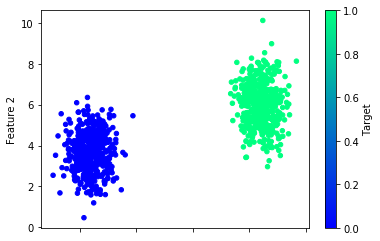

In [3]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [4]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [5]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [7]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, 
                                   activation="relu", 
                                   input_dim=2))

In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [11]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 719us/step - loss: 0.7259 - accuracy: 0.0520
Epoch 2/100
24/24 [==============================] - 0s 863us/step - loss: 0.7097 - accuracy: 0.2040
Epoch 3/100
24/24 [==============================] - 0s 747us/step - loss: 0.7007 - accuracy: 0.3627
Epoch 4/100
24/24 [==============================] - 0s 723us/step - loss: 0.6946 - accuracy: 0.4707
Epoch 5/100
24/24 [==============================] - 0s 728us/step - loss: 0.6896 - accuracy: 0.5467
Epoch 6/100
24/24 [==============================] - 0s 721us/step - loss: 0.6827 - accuracy: 0.6520
Epoch 7/100
24/24 [==============================] - 0s 753us/step - loss: 0.6728 - accuracy: 0.7240
Epoch 8/100
24/24 [==============================] - 0s 751us/step - loss: 0.6602 - accuracy: 0.7827
Epoch 9/100
24/24 [==============================] - 0s 752us/step - loss: 0.6442 - accuracy: 0.8347
Epoch 10/100
24/24 [==============================] - 0s 713us/step - loss: 0.6257 - accura

24/24 [==============================] - 0s 864us/step - loss: 0.1067 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 909us/step - loss: 0.1049 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 794us/step - loss: 0.1031 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 772us/step - loss: 0.1014 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 846us/step - loss: 0.0997 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 805us/step - loss: 0.0980 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 733us/step - loss: 0.0964 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 676us/step - loss: 0.0948 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 733us/step - loss: 0.0933 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 680us/step - loss: 0.0917 - accuracy: 

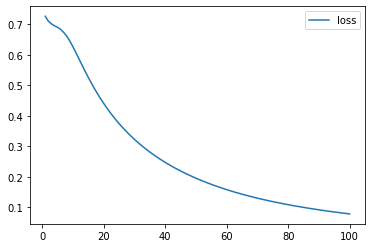

In [12]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

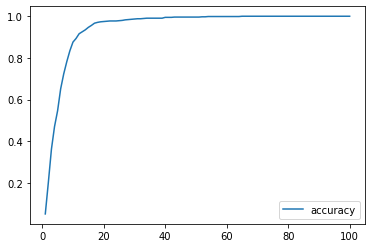

In [13]:
# Plot the accuracy
history_df.plot(y="accuracy")


In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0732 - accuracy: 1.0000
Loss: 0.07318449765443802, Accuracy: 1.0


In [15]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

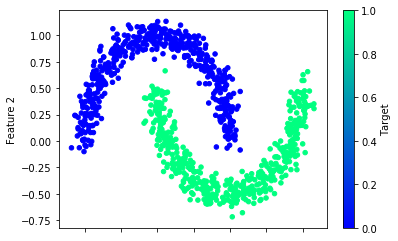

In [16]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [17]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)


In [18]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0339 - accuracy: 0.4787
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8704 - accuracy: 0.5227
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7671 - accuracy: 0.5480
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6991 - accuracy: 0.5813
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6492 - accuracy: 0.6067
Epoch 6/100
24/24 [==============================] - 0s 935us/step - loss: 0.6092 - accuracy: 0.6240
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5757 - accuracy: 0.6533
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5479 - accuracy: 0.6667
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5230 - accuracy: 0.6800
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5014 - accuracy: 0.6920
Epoch 1

Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2623 - accuracy: 0.8907
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2621 - accuracy: 0.8920
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2618 - accuracy: 0.8920
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2616 - accuracy: 0.8907
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2613 - accuracy: 0.8907
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2610 - accuracy: 0.8920
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2607 - accuracy: 0.8920
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2604 - accuracy: 0.8920
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2602 - accuracy: 0.8920
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2600 - accuracy: 0.8920


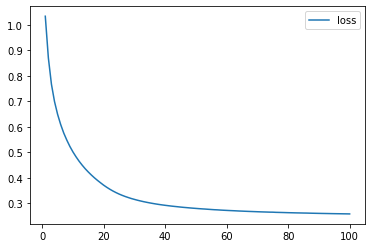

In [19]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

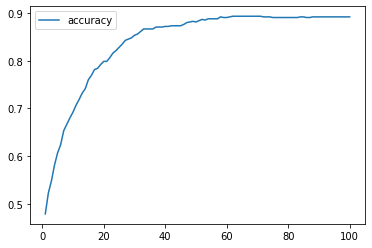

In [20]:
# Plot the loss
history_df.plot(y="accuracy")

### Create the Connective Tissue, the Multiple-Neuron Neural Network

In [21]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [22]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [23]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 727us/step - loss: 0.9052 - accuracy: 0.1627
Epoch 2/100
24/24 [==============================] - 0s 935us/step - loss: 0.8391 - accuracy: 0.3453
Epoch 3/100
24/24 [==============================] - 0s 758us/step - loss: 0.7833 - accuracy: 0.4920
Epoch 4/100
24/24 [==============================] - 0s 844us/step - loss: 0.7354 - accuracy: 0.4987
Epoch 5/100
24/24 [==============================] - 0s 704us/step - loss: 0.6940 - accuracy: 0.5120
Epoch 6/100
24/24 [==============================] - 0s 707us/step - loss: 0.6582 - accuracy: 0.5187
Epoch 7/100
24/24 [==============================] - 0s 745us/step - loss: 0.6262 - accuracy: 0.5427
Epoch 8/100
24/24 [==============================] - 0s 829us/step - loss: 0.5973 - accuracy: 0.5653
Epoch 9/100
24/24 [==============================] - 0s 794us/step - loss: 0.5710 - accuracy: 0.5933
Epoch 10/100
24/24 [==============================] - 0s 743us/step - loss: 0.5465 - accura

24/24 [==============================] - 0s 687us/step - loss: 0.2524 - accuracy: 0.8960
Epoch 82/100
24/24 [==============================] - 0s 685us/step - loss: 0.2521 - accuracy: 0.8960
Epoch 83/100
24/24 [==============================] - 0s 738us/step - loss: 0.2521 - accuracy: 0.8973
Epoch 84/100
24/24 [==============================] - 0s 679us/step - loss: 0.2519 - accuracy: 0.8960
Epoch 85/100
24/24 [==============================] - 0s 676us/step - loss: 0.2519 - accuracy: 0.8973
Epoch 86/100
24/24 [==============================] - 0s 706us/step - loss: 0.2517 - accuracy: 0.8960
Epoch 87/100
24/24 [==============================] - 0s 655us/step - loss: 0.2517 - accuracy: 0.8960
Epoch 88/100
24/24 [==============================] - 0s 705us/step - loss: 0.2516 - accuracy: 0.8960
Epoch 89/100
24/24 [==============================] - 0s 695us/step - loss: 0.2515 - accuracy: 0.8960
Epoch 90/100
24/24 [==============================] - 0s 654us/step - loss: 0.2514 - accuracy: 